In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [2]:
store = pd.read_csv("Superstore.csv")

In [3]:
store.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
store['Order Date'] = pd.to_datetime(store['Order Date'])
store['Ship Date'] = pd.to_datetime(store['Ship Date'])

In [7]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
store2 = store.copy()

In [9]:
store2 = store2.drop(['Row ID', 'Country', 'Postal Code'], axis=1)

### TOTAL PROFIT BY REGION ###

In [10]:
regprof = store2.loc[:,['Order Date', 'Region', 'Profit']]

In [11]:
regprof['Year'] = regprof.loc[:,'Order Date'].dt.year

In [12]:
regprof = regprof.groupby(['Region', 'Year']).sum('Profit').reset_index()

In [13]:
regprof = regprof.pivot(index = 'Year', columns='Region', values='Profit').reset_index()

In [14]:
regprof

Region,Year,Central,East,South,West
0,2014,539.5534,17059.6095,11879.1200,20065.6912
1,2015,11716.8020,21091.0130,8318.5940,20492.1947
2,2016,19899.1629,20141.5961,17702.8084,24051.6069
3,2017,7550.8442,33230.5614,8848.9079,43808.9561


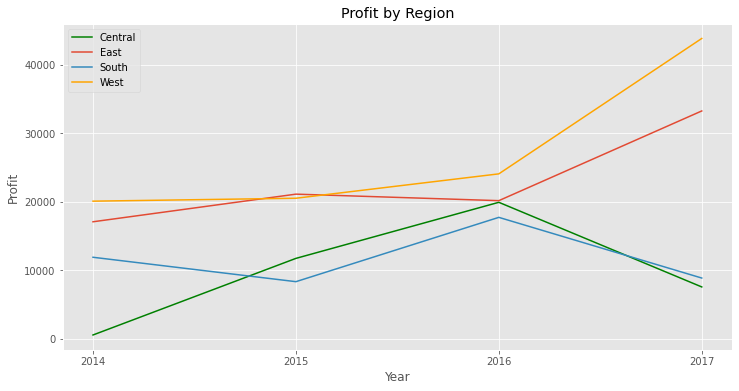

In [15]:
ax= plt.subplots(figsize=(12,6))
ax = sns.lineplot(x='Year', y='Central',color='g', data=regprof, label='Central')
ax1 = sns.lineplot(x='Year', y='East', data=regprof, label='East')
ax2 = sns.lineplot(x='Year', y='South', data=regprof, label='South')
ax3 = sns.lineplot(x='Year', y='West',color='orange', data=regprof, label='West')
plt.title('Profit by Region')
plt.ylabel('Profit')
plt.xticks(np.arange(2014,2018,1.0))
plt.show()

### Profit by Segment ###

In [16]:
sgmn = store2.loc[:,['Order Date','Segment','Profit']]
sgmn['Year'] = sgmn.loc[:,'Order Date'].dt.year
sgmn = sgmn.groupby(['Segment', 'Year']).sum('Profit').reset_index()
sgmn = sgmn.pivot(index='Year', columns='Segment', values='Profit').reset_index()
sgmn

Segment,Year,Consumer,Corporate,Home Office
0,2014,24319.8504,13513.2769,11710.8468
1,2015,28460.1665,20688.3248,12470.1124
2,2016,35770.9532,30995.1690,15029.0521
3,2017,45568.2391,26782.3633,21088.6672


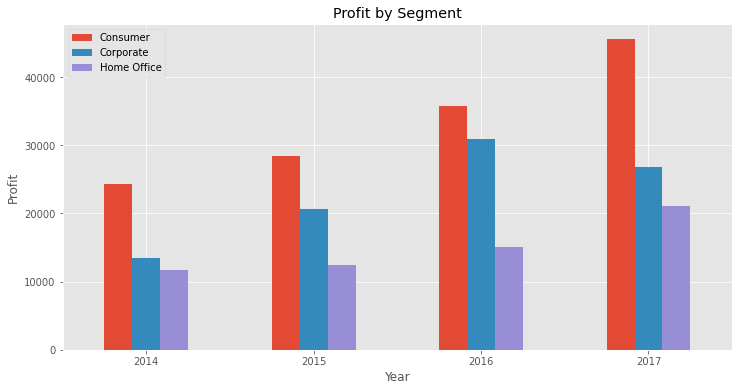

In [17]:
sgmn.plot(figsize=(12,6), x='Year', y=['Consumer', 'Corporate', 'Home Office'], kind='bar')
plt.title('Profit by Segment')
plt.legend(['Consumer', 'Corporate','Home Office'])
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.show()

### Profit by Product Category ###

In [18]:
prft = store2.loc[:,['Order Date','Category','Profit']]
prft['Year'] = prft.loc[:,'Order Date'].dt.year
prft = prft.groupby(['Category','Year']).sum('Profit').reset_index()
prft = prft.pivot(index='Year', columns='Category', values='Profit').reset_index()
prft

Category,Year,Furniture,Office Supplies,Technology
0,2014,5457.7255,22593.4161,21492.8325
1,2015,3015.2029,25099.5338,33503.8670
2,2016,6959.9531,35061.2292,39773.9920
3,2017,3018.3913,39736.6217,50684.2566


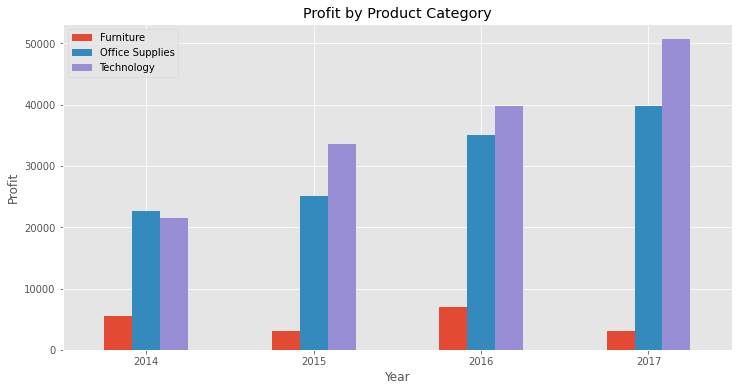

In [19]:
prft.plot(figsize=(12,6), x='Year', y=['Furniture','Office Supplies','Technology'], kind='bar')
plt.title('Profit by Product Category')
plt.legend(['Furniture', 'Office Supplies', 'Technology'])
plt.ylabel('Profit')
plt.xticks(rotation=0)
plt.show()

### Total Quantity Ordered by Product Category ###

In [20]:
qty = store2.loc[:,['Order Date', 'Category', 'Quantity']]
qty['Year'] = qty.loc[:,'Order Date'].dt.year
qty = qty.groupby(['Category', 'Year']).sum('Quantity').reset_index()
qty = qty.pivot(index='Year', columns='Category', values='Quantity').reset_index()
qty

Category,Year,Furniture,Office Supplies,Technology
0,2014,1623,4569,1389
1,2015,1775,4715,1489
2,2016,2193,5946,1698
3,2017,2437,7676,2363


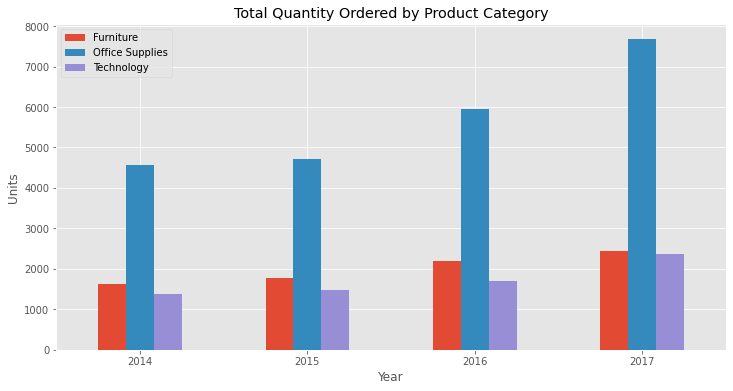

In [21]:
qty.plot(figsize=(12,6), x='Year', y=['Furniture','Office Supplies','Technology'], kind='bar')
plt.title('Total Quantity Ordered by Product Category')
plt.legend(['Furniture', 'Office Supplies', 'Technology'])
plt.ylabel('Units')
plt.xticks(rotation=0)
plt.show()

### Most Ordered Product Category ###

In [22]:
prd = store2.loc[:,['Order ID', 'Category', 'Sub-Category', 'Quantity']]
prd.head()

,Order ID,Category,Sub-Category,Quantity
0,CA-2016-152156,Furniture,Bookcases,2
1,CA-2016-152156,Furniture,Chairs,3
2,CA-2016-138688,Office Supplies,Labels,2
3,US-2015-108966,Furniture,Tables,5
4,US-2015-108966,Office Supplies,Storage,2


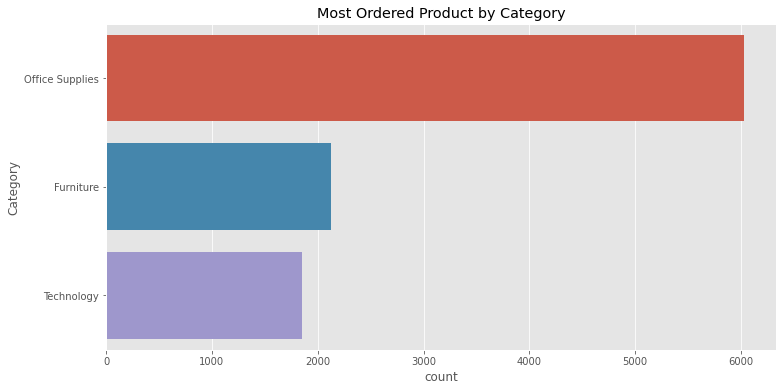

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=prd, order=prd['Category'].value_counts().index)
plt.title('Most Ordered Product by Category')
plt.show()

### Most Ordered Office Supplies Product ###

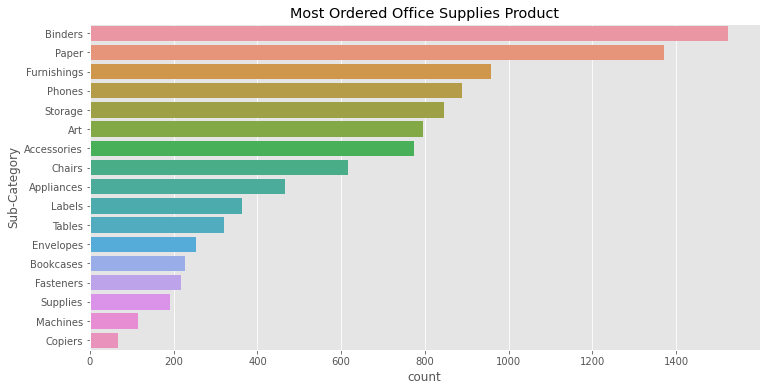

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(y='Sub-Category', data=prd, order=prd['Sub-Category'].value_counts().index)
plt.title('Most Ordered Office Supplies Product')
plt.show()

### Top Profitable Customer ### 

In [25]:
cst = store2.loc[:,['Customer ID', 'Customer Name', 'Profit']]
cst = cst.groupby(['Customer ID','Customer Name']).sum('Profit').reset_index()
top_cst = cst.nlargest(10,'Profit')
top_cst = top_cst.sort_values(by=['Profit'])

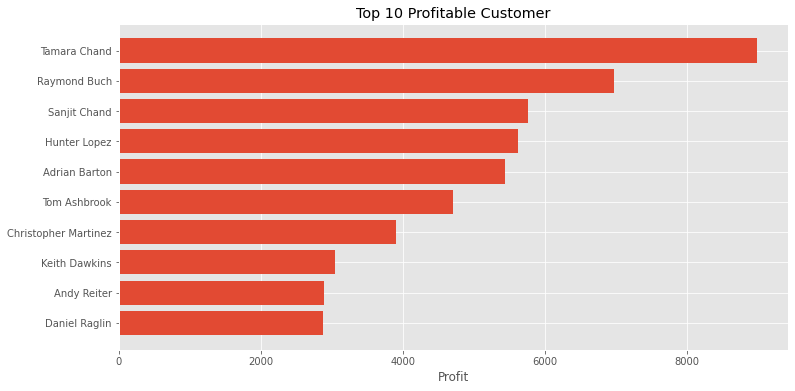

In [26]:
plt.figure(figsize=(12,6))
plt.barh(top_cst['Customer Name'], top_cst['Profit'])
plt.title('Top 10 Profitable Customer')
plt.xlabel('Profit')
plt.show()

### DAY TAKES FROM ORDER TO SHIP ###

In [27]:
ship = store2.loc[:,['Order ID','Order Date', 'Ship Date','Quantity']]
ship['days'] = (ship.loc[:,'Ship Date'] - ship.loc[:,'Order Date']).astype(str) 

In [28]:
ship['days'] = ship.loc[:,'days'].str[0].astype(int)

In [29]:
ship.groupby('Order ID').sum('Quantity').reset_index()

,Order ID,Quantity,days
0,CA-2014-100006,3,6
1,CA-2014-100090,9,8
2,CA-2014-100293,6,4
3,CA-2014-100328,1,6
4,CA-2014-100363,5,14
...,...,...,...
5004,US-2017-168802,4,4
5005,US-2017-169320,7,4
5006,US-2017-169488,7,4
5007,US-2017-169502,8,8


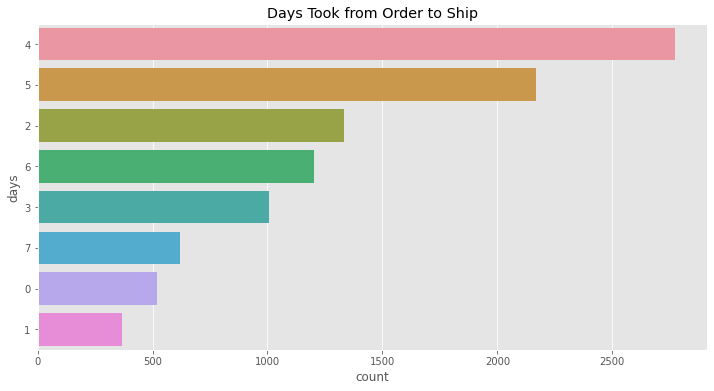

In [30]:
plt.figure(figsize = (12,6))
sns.countplot(y='days', data=ship, order=ship['days'].value_counts().index)
plt.title('Days Took from Order to Ship')
plt.show()